In [1]:
import pandas as pd
import numpy as np

In [2]:
data_path = '../clustering/gem_candidates_soft.csv'
df = pd.read_csv(data_path)
print(f'columns: {df.columns}')
df

columns: Index(['business_id', 'stars', 'review_count', 'attr_score', 'cat_score',
       'avg_review_stars', 'std_review_stars_scaled', 'pos_review_ratio',
       'neg_review_ratio', 'neu_review_ratio', 'long_review_ratio',
       'avg_review_length_scaled', 'avg_word_count_scaled',
       'avg_useful_scaled', 'avg_funny_scaled', 'avg_cool_scaled',
       'interact_score_mean_scaled', 'sentiment_score_mean_scaled',
       'first_review_date', 'last_review_date', 'recent_review_ratio',
       'review_timespan_days_scaled', 'review_density_per_day_scaled',
       'review_burst_score_scaled', 'avg_user_avg_stars', 'elite_user_ratio',
       'avg_user_account_age_days', 'avg_user_review_count_log_scaled',
       'avg_user_useful_log_scaled', 'avg_user_funny_log_scaled',
       'avg_user_cool_log_scaled', 'avg_user_fans_log_scaled',
       'avg_user_compliments_log_scaled', 'gem_label'],
      dtype='object')


,business_id,stars,review_count,attr_score,cat_score,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,...,avg_user_avg_stars,elite_user_ratio,avg_user_account_age_days,avg_user_review_count_log_scaled,avg_user_useful_log_scaled,avg_user_funny_log_scaled,avg_user_cool_log_scaled,avg_user_fans_log_scaled,avg_user_compliments_log_scaled,gem_label
0,il_Ro8jwPlHresjw9EGmBg,-1.132288,-0.212222,6.5,1.670499,2.413793,0.776556,0.448276,0.379310,0.172414,...,3.072069,0.172414,-0.875370,-0.819606,-0.778717,-1.033356,-0.647838,-0.889185,-0.525681,0
1,qhDdDeI3K4jy2KyzwFN53w,0.383586,-0.121393,0.0,1.000000,4.052632,-0.294102,0.605263,0.078947,0.315789,...,4.029737,0.631579,1.144675,1.419795,1.500704,1.589323,1.493492,1.751805,1.518337,1
2,kfNv-JZpuN6TVNSO6hHdkw,0.383586,-0.284884,2.5,1.000000,3.950000,0.515631,0.750000,0.100000,0.150000,...,4.003500,0.250000,-1.674202,0.135378,-0.065015,-0.173017,-0.074152,-0.423573,-0.281522,0
3,x1mhq4IpWctQOBM06dU8vg,-2.142871,-0.239470,0.5,1.692475,1.600000,0.036412,0.280000,0.600000,0.120000,...,2.148800,0.040000,-1.743473,-1.965375,-1.567713,-1.487938,-1.922442,-1.315666,-1.999048,0
4,seKihQKpGGnCeLuELRQPSQ,-0.121706,1.867748,5.5,2.185136,3.333333,0.525084,0.518519,0.211111,0.270370,...,3.611852,0.255556,-0.321709,0.125148,0.827640,0.988959,1.010086,-0.197925,0.322949,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,-0.121706,-0.066896,0.0,1.381861,3.346939,0.496569,0.428571,0.265306,0.306122,...,3.660612,0.346939,-0.085839,0.159726,0.208484,0.743959,0.339780,0.322353,0.582125,0
5331,AM7O0cwkxm6w_e0Q7-f9FQ,0.383586,-0.203139,0.0,1.381861,3.866667,0.558162,0.633333,0.233333,0.133333,...,3.778333,0.366667,-1.488153,-0.101261,-0.306420,-0.299942,-0.240725,-0.332186,-0.332175,0
5332,Gi1QPLu_y8rLS3uTN9Z_VA,-0.626997,-0.357547,0.0,1.000000,3.083333,1.526495,0.500000,0.500000,0.000000,...,3.125000,0.083333,-0.005377,-0.278233,-0.632478,-0.440149,-0.813292,-0.558896,-0.932551,0
5333,fn3ybdsRSrIDpKZTsRuAWg,0.383586,-0.357547,0.0,2.208772,4.083333,0.853708,0.750000,0.250000,0.000000,...,3.890000,0.083333,1.851451,-0.627310,-0.471674,-0.359534,-0.366096,-0.501931,-0.635779,0


In [3]:
# 选择特征，去掉id和lebal,去掉直接相关的stars, review_count, avg_review_stars
features = [
    'attr_score', 'cat_score',
    'std_review_stars_scaled',
    'pos_review_ratio', 'neg_review_ratio', 'neu_review_ratio',
    'long_review_ratio', 'avg_review_length_scaled', 'avg_word_count_scaled',
    'avg_useful_scaled', 'avg_funny_scaled', 'avg_cool_scaled',
    'interact_score_mean_scaled', 'sentiment_score_mean_scaled',
    'recent_review_ratio', 'review_timespan_days_scaled', 'review_burst_score_scaled',
    'avg_user_avg_stars', 'elite_user_ratio', 'avg_user_account_age_days',
    'avg_user_review_count_log_scaled', 'avg_user_useful_log_scaled',
    'avg_user_funny_log_scaled', 'avg_user_cool_log_scaled',
    'avg_user_fans_log_scaled', 'avg_user_compliments_log_scaled'
]

In [4]:
## SMOTE 采样
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

def resampling(X,y, features):
    """
    对数据进行SMOTE采样
    :param X: 特征数据
    :param y: 标签数据
    :param features: 特征列表
    :return: 采样后的DataFrame
    """
    # 将数据分为X和y
    

    # 对X，y进行SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    # 将X_resampled和y_resampled转换为DataFrame
    X_resampled = pd.DataFrame(X_resampled, columns=features)
    y_resampled = pd.DataFrame(y_resampled, columns=['gem_label'])
    # 将X_resampled和y_resampled合并
    df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

    print(f"before resamling: {len(df)}, after resampling: {len(df_resampled)}")
    
    return df_resampled

In [5]:
def split(df, features, is_resample=False):
    """
    将数据分为训练集和测试集
    :param df: DataFrame
    :param features: 特征列表
    :param is_resample: 是否采样
    :return: 训练集和测试集
    """
    X_train, X_test, y_train, y_test = train_test_split(df[features], df['gem_label'], test_size=0.2, random_state=42)
    if is_resample:
        # 对训练集进行SMOTE采样
        print(f"before resampling X_train: {len(X_train)}")
        df_train = resampling(X_train, y_train, features)
        X_train = df_train[features]
        y_train = df_train['gem_label']
        print(f"after resampling X_train: {len(X_train)}")

    
    print(f"Split data into train and test sets: {len(X_train)} samples")
    
    return X_train, X_test, y_train, y_test


In [6]:
# LR,RF,XGBoost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
classifiers = {
    
    'Logistic Regression': LogisticRegression(max_iter=1000,class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(scale_pos_weight=5.2, eval_metric='logloss')
}

In [7]:
from sklearn.model_selection import GridSearchCV
def hyperparams_tuning(X_train, y_train, classifiers, classifier=None):
    """
    超参数调优
    params:
        X_train: 训练集特征
        y_train: 训练集标签
        classifiers: 分类器字典
        classifier: 分类器
    return:
        best_models: 最佳模型字典
    """
    if classifier is None:
        print("No classifier provided.")
        return None
    
    if classifier not in classifiers:
        print(f"Classifier {classifier} not found in the dictionary.")
        return None
    
    # 定义超参数网格
    param_grid = {
        'Logistic Regression': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l2'],
            'solver': ['lbfgs', 'liblinear']
        },
        'Random Forest': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5]
        },
        'XGBoost': {
            'n_estimators': [10, 50, 100],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2]
        }
    }
    # 获取模型
    model = classifiers[classifier]
    # 定义网格搜索
    grid_search = GridSearchCV(model, param_grid[classifier], cv=5, scoring='f1', n_jobs=-1, verbose=1)
    # 拟合模型
    grid_search.fit(X_train, y_train.values.ravel())
    # 获取最佳模型
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(f"Best parameters for {classifier}: {best_params}")
    print(f"Best score for {classifier}: {best_score}")
    return best_model, best_params, best_score

In [8]:
from sklearn.metrics import classification_report, accuracy_score, f1_score
def evaluate_model(model, X_test, y_test):
    """
    评估模型
    params:
        model: 训练好的模型
        X_test: 测试集特征
        y_test: 测试集标签
    return:
        None
    """
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("F1 Score:", f1)

    return acc, f1

In [9]:
# 绘制PR曲线
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
def plot_pr_curve(y_test, y_scores):
    """
    绘制PR曲线
    params:
        y_test: 测试集标签
        y_scores: 模型预测的概率
    return:
        None
    """
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    average_precision = average_precision_score(y_test, y_scores)
    
    plt.figure()
    plt.plot(recall, precision, label='PR curve (area = {:.2f})'.format(average_precision))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

In [10]:
def LRPipeline(data, features):
    """
    LR模型训练和评估
    :param data: DataFrame
    :param features: 特征列表
    :return: None
    """
    # 分割数据集
    X_train, X_test, y_train, y_test = split(data, features, is_resample=False)
    
    # 调参
    best_model, best_params, best_score = hyperparams_tuning(X_train, y_train, classifiers, 'Logistic Regression')
    
    # 评估模型
    acc,f1 = evaluate_model(best_model, X_test, y_test)
    
    # 绘制PR曲线
    y_scores = best_model.predict_proba(X_test)[:, 1]
    plot_pr_curve(y_test, y_scores)

    return y_scores, best_model, acc, f1


Split data into train and test sets: 4268 samples
Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best parameters for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best score for Logistic Regression: 0.8792191589162446
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       892
           1       0.76      0.97      0.85       175

    accuracy                           0.95      1067
   macro avg       0.88      0.96      0.91      1067
weighted avg       0.96      0.95      0.95      1067

Accuracy: 0.9456419868791003
F1 Score: 0.8542713567839196


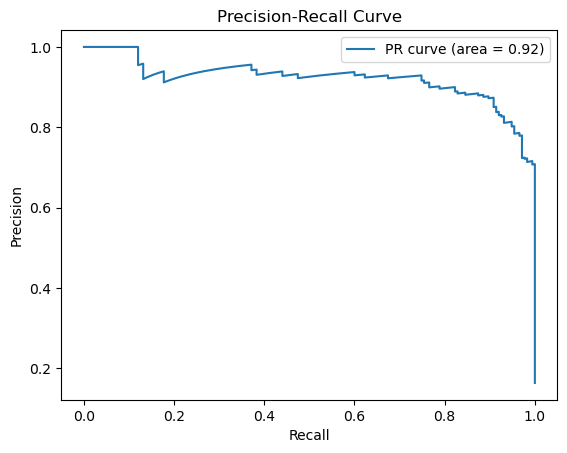

In [11]:
scores_lr, model_lr, acc_lr, f1_lr = LRPipeline(df, features)

In [12]:
def RFPipeline(df, features):
    """
    RF模型训练和评估
    :param df: DataFrame
    :param features: 特征列表
    :return: None
    """
    # 分割数据集
    X_train, X_test, y_train, y_test = split(df, features, is_resample=False)
    
    # 调参
    best_model, best_params, best_score = hyperparams_tuning(X_train, y_train, classifiers, 'Random Forest')
    
    # 评估模型
    acc,f1 = evaluate_model(best_model, X_test, y_test)
    
    # 绘制PR曲线
    y_scores = best_model.predict_proba(X_test)[:, 1]
    plot_pr_curve(y_test, y_scores)

    return y_scores, best_model, acc, f1

Split data into train and test sets: 4268 samples
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best score for Random Forest: 0.9141067758595522
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       892
           1       0.97      0.90      0.93       175

    accuracy                           0.98      1067
   macro avg       0.97      0.95      0.96      1067
weighted avg       0.98      0.98      0.98      1067

Accuracy: 0.9784442361761949
F1 Score: 0.9317507418397626


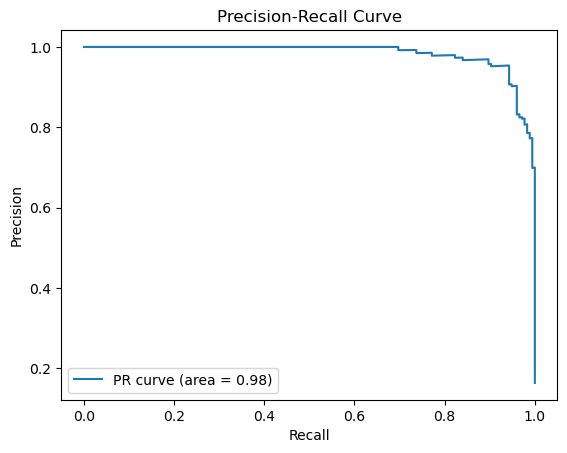

In [13]:
scores_rf, model_rf, acc_rf, f1_rf = RFPipeline(df, features)

In [14]:
def XGBoostPipeline(df,features):
    """
    XGBoost模型训练和评估
    :param df: DataFrame
    :param features: 特征列表
    :return: None
    """
    # 分割数据集
    X_train, X_test, y_train, y_test = split(df, features, is_resample=False)
    
    # 调参
    best_model, best_params, best_score = hyperparams_tuning(X_train, y_train, classifiers, 'XGBoost')
    
    # 评估模型
    acc,f1 = evaluate_model(best_model, X_test, y_test)
    
    # 绘制PR曲线
    y_scores = best_model.predict_proba(X_test)[:, 1]
    plot_pr_curve(y_test, y_scores)

    return y_scores, best_model, acc, f1

Split data into train and test sets: 4268 samples
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}
Best score for XGBoost: 0.94047807579121
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       892
           1       0.91      0.97      0.94       175

    accuracy                           0.98      1067
   macro avg       0.95      0.98      0.96      1067
weighted avg       0.98      0.98      0.98      1067

Accuracy: 0.9803186504217432
F1 Score: 0.9418282548476454


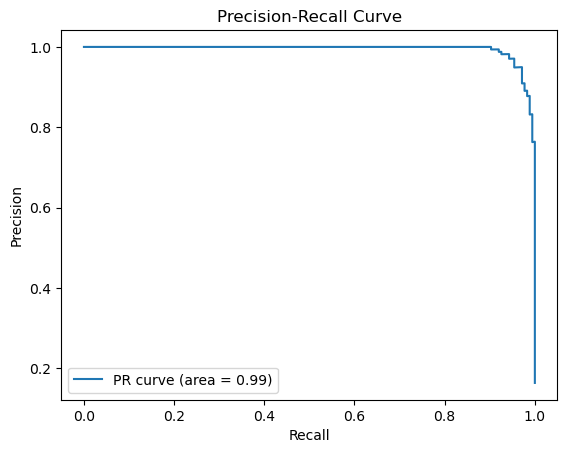

In [15]:
scores_xgb, model_xgb, acc_xgb, f1_xgb = XGBoostPipeline(df, features)

In [16]:
X = df[features]
y = df['gem_label']
# 评估LR模型
evaluate_model(model_lr, X, y)
evaluate_model(model_rf, X, y)
evaluate_model(model_xgb, X, y)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      4475
           1       0.80      0.98      0.88       860

    accuracy                           0.96      5335
   macro avg       0.90      0.96      0.93      5335
weighted avg       0.96      0.96      0.96      5335

Accuracy: 0.9568884723523898
F1 Score: 0.8794549266247379
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4475
           1       0.99      0.98      0.99       860

    accuracy                           1.00      5335
   macro avg       0.99      0.99      0.99      5335
weighted avg       1.00      1.00      1.00      5335

Accuracy: 0.9955014058106841
F1 Score: 0.9859484777517564
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4475
           1       0.98      0.99      0.99       86

(0.9953139643861293, np.float64(0.9855907780979827))

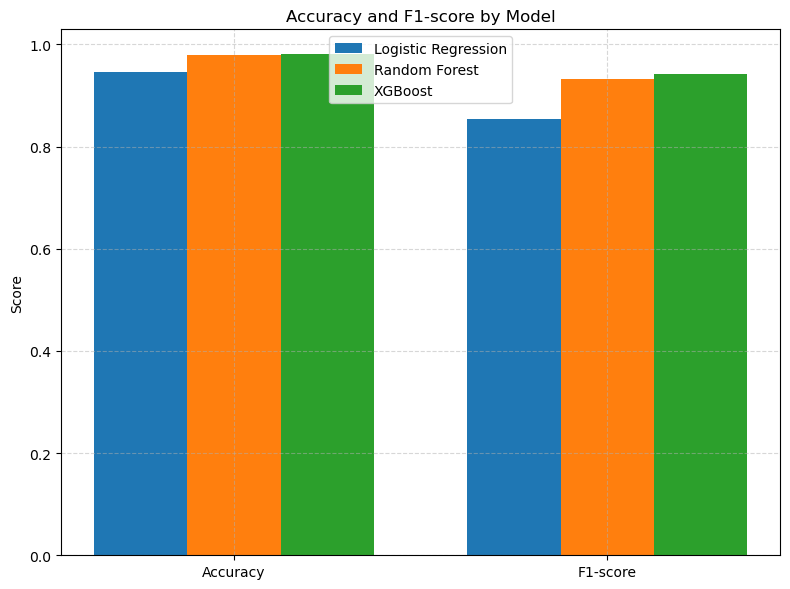

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 模型指标
accs = [acc_lr, acc_rf, acc_xgb]
f1s = [f1_lr, f1_rf, f1_xgb]

# 模型名称
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
metrics = ['Accuracy', 'F1-score']

# 构造画图用数据
x = np.arange(len(metrics))  # 横轴位置
width = 0.25  # 每个柱子的宽度

# 创建图形
fig, ax = plt.subplots(figsize=(8, 6))

# 每种模型画一组柱子，错开宽度
ax.bar(x - width, [accs[0], f1s[0]], width, label=models[0])
ax.bar(x,         [accs[1], f1s[1]], width, label=models[1])
ax.bar(x + width, [accs[2], f1s[2]], width, label=models[2])

# 添加标签和图例
ax.set_ylabel('Score')
ax.set_title('Accuracy and F1-score by Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()





In [ ]:
df['gem_prob'] = model_xgb.predict_proba(X)[:, 1].astype(float)
df

,business_id,stars,review_count,attr_score,cat_score,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,...,elite_user_ratio,avg_user_account_age_days,avg_user_review_count_log_scaled,avg_user_useful_log_scaled,avg_user_funny_log_scaled,avg_user_cool_log_scaled,avg_user_fans_log_scaled,avg_user_compliments_log_scaled,gem_label,gem_score
0,il_Ro8jwPlHresjw9EGmBg,-1.132288,-0.212222,6.5,1.670499,2.413793,0.776556,0.448276,0.379310,0.172414,...,0.172414,-0.875370,-0.819606,-0.778717,-1.033356,-0.647838,-0.889185,-0.525681,0,2.140831e-07
1,qhDdDeI3K4jy2KyzwFN53w,0.383586,-0.121393,0.0,1.000000,4.052632,-0.294102,0.605263,0.078947,0.315789,...,0.631579,1.144675,1.419795,1.500704,1.589323,1.493492,1.751805,1.518337,1,9.999212e-01
2,kfNv-JZpuN6TVNSO6hHdkw,0.383586,-0.284884,2.5,1.000000,3.950000,0.515631,0.750000,0.100000,0.150000,...,0.250000,-1.674202,0.135378,-0.065015,-0.173017,-0.074152,-0.423573,-0.281522,0,2.571979e-06
3,x1mhq4IpWctQOBM06dU8vg,-2.142871,-0.239470,0.5,1.692475,1.600000,0.036412,0.280000,0.600000,0.120000,...,0.040000,-1.743473,-1.965375,-1.567713,-1.487938,-1.922442,-1.315666,-1.999048,0,1.995782e-04
4,seKihQKpGGnCeLuELRQPSQ,-0.121706,1.867748,5.5,2.185136,3.333333,0.525084,0.518519,0.211111,0.270370,...,0.255556,-0.321709,0.125148,0.827640,0.988959,1.010086,-0.197925,0.322949,0,1.643237e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2f1ZnZg7730yChhV24ARJw,-0.121706,-0.066896,0.0,1.381861,3.346939,0.496569,0.428571,0.265306,0.306122,...,0.346939,-0.085839,0.159726,0.208484,0.743959,0.339780,0.322353,0.582125,0,6.461867e-06
5331,AM7O0cwkxm6w_e0Q7-f9FQ,0.383586,-0.203139,0.0,1.381861,3.866667,0.558162,0.633333,0.233333,0.133333,...,0.366667,-1.488153,-0.101261,-0.306420,-0.299942,-0.240725,-0.332186,-0.332175,0,6.820871e-07
5332,Gi1QPLu_y8rLS3uTN9Z_VA,-0.626997,-0.357547,0.0,1.000000,3.083333,1.526495,0.500000,0.500000,0.000000,...,0.083333,-0.005377,-0.278233,-0.632478,-0.440149,-0.813292,-0.558896,-0.932551,0,2.379078e-04
5333,fn3ybdsRSrIDpKZTsRuAWg,0.383586,-0.357547,0.0,2.208772,4.083333,0.853708,0.750000,0.250000,0.000000,...,0.083333,1.851451,-0.627310,-0.471674,-0.359534,-0.366096,-0.501931,-0.635779,0,7.512900e-06


In [ ]:
# 选出前135个商家
df.sort_values(by='gem_prob', ascending=False, inplace=True)
df.reset_index(drop=True, inplace=True)
df_TOP = df.iloc[:135, :].copy()
df_TOP.reset_index(drop=True, inplace=True)
df_TOP

,business_id,stars,review_count,attr_score,cat_score,avg_review_stars,std_review_stars_scaled,pos_review_ratio,neg_review_ratio,neu_review_ratio,...,elite_user_ratio,avg_user_account_age_days,avg_user_review_count_log_scaled,avg_user_useful_log_scaled,avg_user_funny_log_scaled,avg_user_cool_log_scaled,avg_user_fans_log_scaled,avg_user_compliments_log_scaled,gem_label,gem_score
0,ioHnS9WgL3Cm0saFP-4lkg,0.888877,-0.339381,2.0,1.000000,4.533333,-0.970271,0.733333,0.000000,0.266667,...,1.000000,1.752043,3.000955,3.182893,3.776938,3.152555,3.271195,2.946136,1,0.999998
1,bhPyMPCsIiQiBleXhQSGDg,0.383586,-0.402961,2.0,1.000000,4.142857,-1.074164,0.714286,0.000000,0.285714,...,0.857143,-0.512255,3.427331,3.392823,3.741120,3.277912,2.542067,2.919113,1,0.999998
2,ZrBnv7j-U7LSwcor8QpgsA,1.394168,-0.421127,1.0,1.931621,4.800000,-1.548796,0.800000,0.000000,0.200000,...,0.800000,0.793406,1.562419,1.897509,2.248730,1.833456,2.482969,1.925579,1,0.999996
3,WC1dePVfx8dGEeZqyDLmvA,1.394168,-0.421127,3.0,1.372295,5.000000,-2.422836,1.000000,0.000000,0.000000,...,1.000000,2.342908,2.082734,2.184860,2.288423,2.108715,3.058108,2.511556,1,0.999996
4,GJaeqJI6IK7Xa4DT2W06BQ,0.888877,-0.393878,-1.5,1.000000,4.625000,-1.411332,0.625000,0.000000,0.375000,...,1.000000,0.256920,2.750982,2.687551,2.596810,2.633301,2.850947,2.423688,1,0.999996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,JzsFdV0VwnbXK3b65mB9ug,1.394168,-0.393878,0.0,1.398330,4.750000,-1.518119,0.750000,0.000000,0.250000,...,0.875000,2.044947,1.423392,1.074432,1.158472,0.984791,1.190369,1.008841,1,0.999966
131,d_U9cjHBKqc4QYOM3rxEzQ,0.888877,-0.402961,0.0,1.723518,4.714286,-1.469180,0.571429,0.000000,0.428571,...,0.857143,-0.246172,1.369573,1.599705,1.263603,1.601279,2.642016,2.344626,1,0.999966
132,NPLAsKyzkyO0xWA5scIZlg,0.888877,-0.112311,0.0,1.000000,4.300000,-0.755040,0.675000,0.050000,0.275000,...,0.950000,-0.291705,1.589933,1.554964,1.374872,1.508511,2.059934,1.810877,1,0.999966
133,jiLGdnf42eYftkqfU2ze1w,-0.121706,-0.203139,0.5,1.386337,3.366667,0.719490,0.500000,0.366667,0.133333,...,0.433333,0.876350,0.979356,1.355009,1.952407,1.475703,0.996450,2.002127,1,0.999966
